
**longitude & latitude**: These columns represent the geographic coordinates of the center of each district. Longitude measures how far east or west a location is from a reference line, while latitude measures how far north or south it is. Together, they pinpoint the location of the housing district.

**housing_median_age**: This is the median age of the houses within that district. A lower number means the houses are, on average, newer.

*total_rooms*: This column indicates the total number of rooms in all the houses within the district.

**total_bedrooms**: This is a subset of total_rooms and represents the total number of bedrooms in the district.

**population**: This is the total number of people living in that district.

**households**: This column represents the total number of households in the district. A household is typically a group of people who live together in a single housing unit.

**median_income**: This is the median income for households within the district. This value is typically measured in tens of thousands of dollars.

**ocean_proximity**: This is a categorical feature that describes how close the district is to the ocean. The values in this column will likely be categories such as 'NEAR BAY', 'INLAND', '<1H OCEAN', etc.

**median_house_value**: This is the median value of the houses in the district, measured in US dollars. This is often the target variable in real estate prediction models.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
df=pd.read_csv('dataset.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [91]:
# checking null values in the dataset
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Text(0.5, 1.0, 'Houses v/s No.of Rooms')

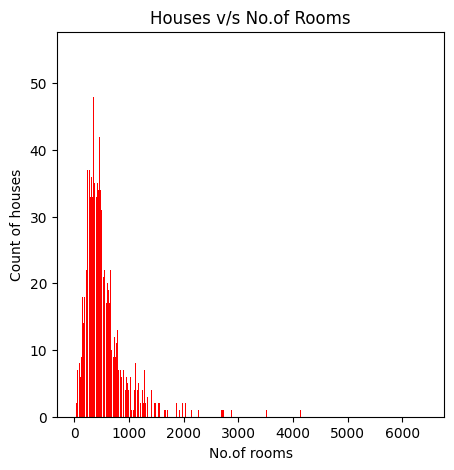

In [92]:
#checking the spread of total_bedrooms 
plt.figure(figsize=(5,5))
plt.bar(df['total_bedrooms'].value_counts().index,df['total_bedrooms'].value_counts(),color='red')
plt.xlabel('No.of rooms')
plt.ylabel('Count of houses')
plt.title('Houses v/s No.of Rooms')

In [93]:
print(df['total_bedrooms'].median())
print(df['total_bedrooms'].mean())
print(df['total_bedrooms'].max())
print(df['total_bedrooms'].std())

435.0
537.8705525375618
6445.0
421.3850700740323


#replacing na values with average values of that region
df.isna().sum()

In [94]:
print(df.shape)
print(len(df['longitude'].unique()))
print(len(df['latitude'].unique()))

(20640, 10)
844
862


With this we are clear that we can use try and use the pairing of longitude and latitude to fill na values

In [95]:
median=df.groupby(['latitude','longitude'])['total_bedrooms'].median()
def fillna(row):
    if pd.isna(row['total_bedrooms']):
        return median.get((row['latitude'],row['longitude'],np.nan))
    else:
        return row['total_bedrooms']
df['total_bedrooms']=df.apply(fillna,axis=1)        

In [96]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**This shows that we have unique latitude and longitude pairings so we will come back to this in the prediction part**

In [97]:
# statistics of house price
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [98]:
#statistics for house age
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

Text(0.5, 1.0, 'Houses v/s Ocean Proximity')

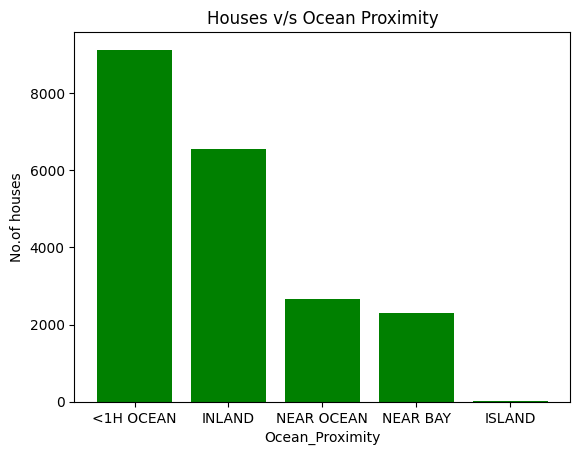

In [99]:
# distribution of houses v/s ocean proximity
plt.bar(df['ocean_proximity'].value_counts().index,df['ocean_proximity'].value_counts(),color='green')
plt.xlabel('Ocean_Proximity')
plt.ylabel('No.of houses')
plt.title("Houses v/s Ocean Proximity")

Text(0.5, 1.0, 'Ocean Proximity v/s Mean age')

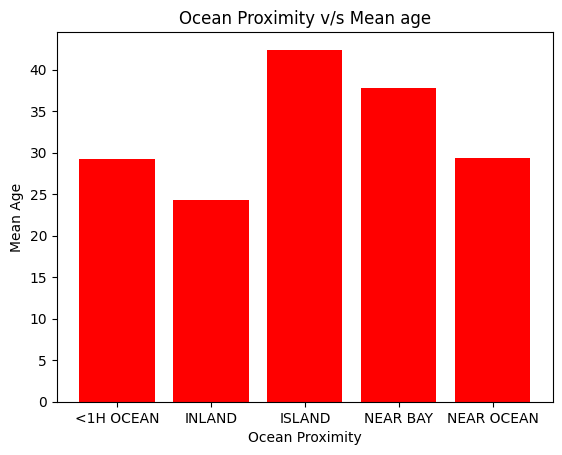

In [100]:
# distribution of age of houses v/s ocean proximity
a=df.groupby('ocean_proximity')['housing_median_age'].mean()
plt.bar(a.index,a.values,color='red')
plt.xlabel('Ocean Proximity')
plt.ylabel('Mean Age')
plt.title("Ocean Proximity v/s Mean age")

In [101]:
#range of median income
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [102]:
#room statistics
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

Text(0.5, 1.0, 'Price v/s Income')

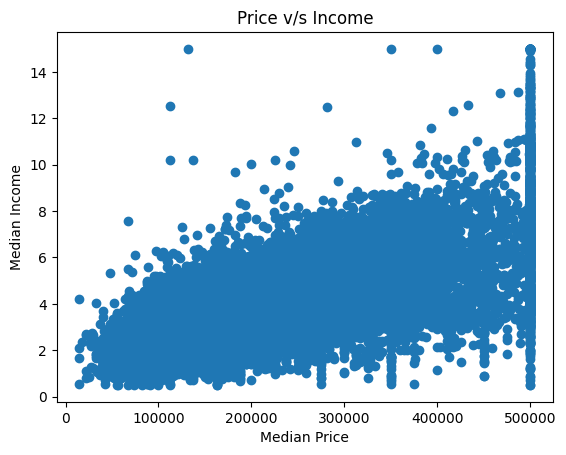

In [103]:
plt.scatter(y=df['median_income'],x=df['median_house_value'])
plt.xlabel('Median Price')
plt.ylabel('Median Income')
plt.title('Price v/s Income')

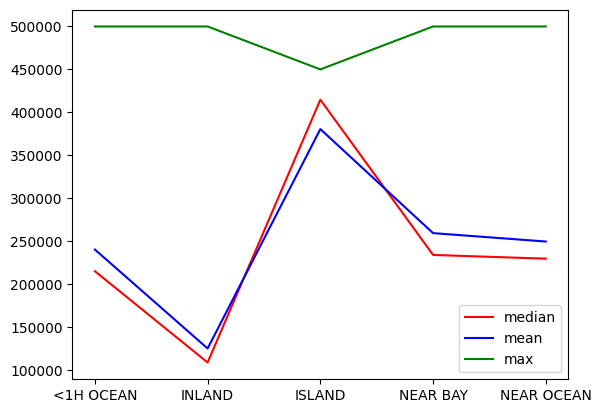

In [104]:
#median_house_value v/s ocean proximity
a=df.groupby('ocean_proximity')['median_house_value'].median()
b=df.groupby('ocean_proximity')['median_house_value'].mean()
c=df.groupby('ocean_proximity')['median_house_value'].max()

plt.plot(a.index,a.values,color='red',label='median')
plt.plot(b.index,b.values,color='blue',label='mean')
plt.plot(c.index,c.values,color='green',label='max')

plt.legend()
plt.show()

Text(0.5, 1.0, 'Total Rooms v/s Total Bedrooms')

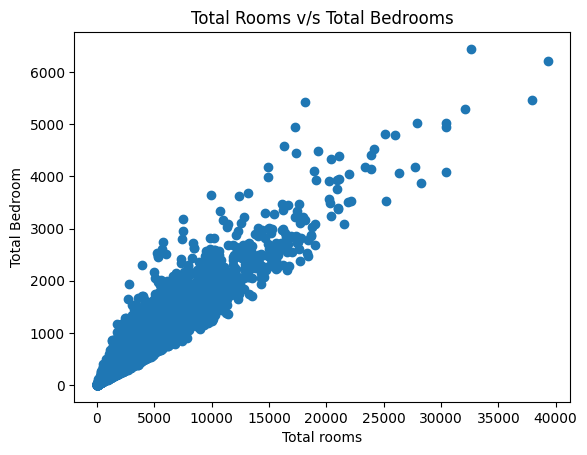

In [105]:
#total_rooms v/s total_bedrooms
plt.scatter(df['total_rooms'],df['total_bedrooms'])
plt.xlabel('Total rooms')
plt.ylabel('Total Bedroom')
plt.title('Total Rooms v/s Total Bedrooms')

Text(0.5, 1.0, 'Total Rooms v/s Median Price')

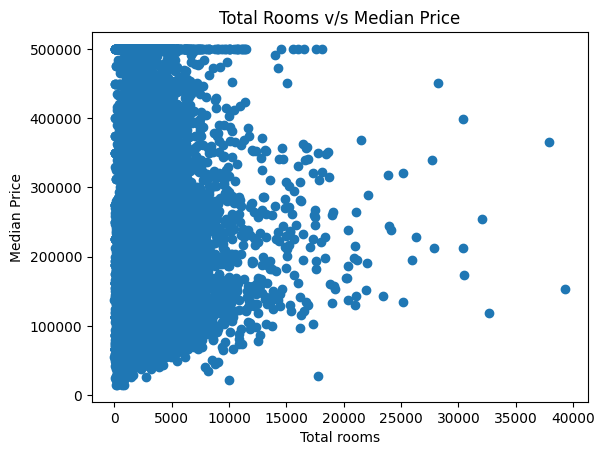

In [106]:
#total_rooms v/s price
plt.scatter(df['total_rooms'],df['median_house_value'])
plt.xlabel('Total rooms')
plt.ylabel('Median Price')
plt.title('Total Rooms v/s Median Price')

Text(0.5, 1.0, 'Median Income v/s Median Price')

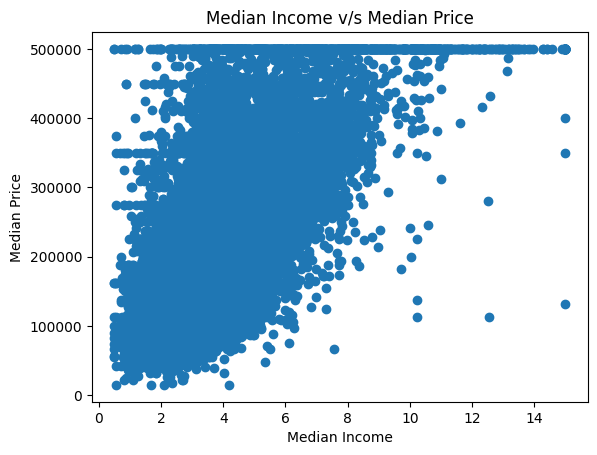

In [107]:
#Income v/s price
plt.scatter(df['median_income'],df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median Price')
plt.title('Median Income v/s Median Price')

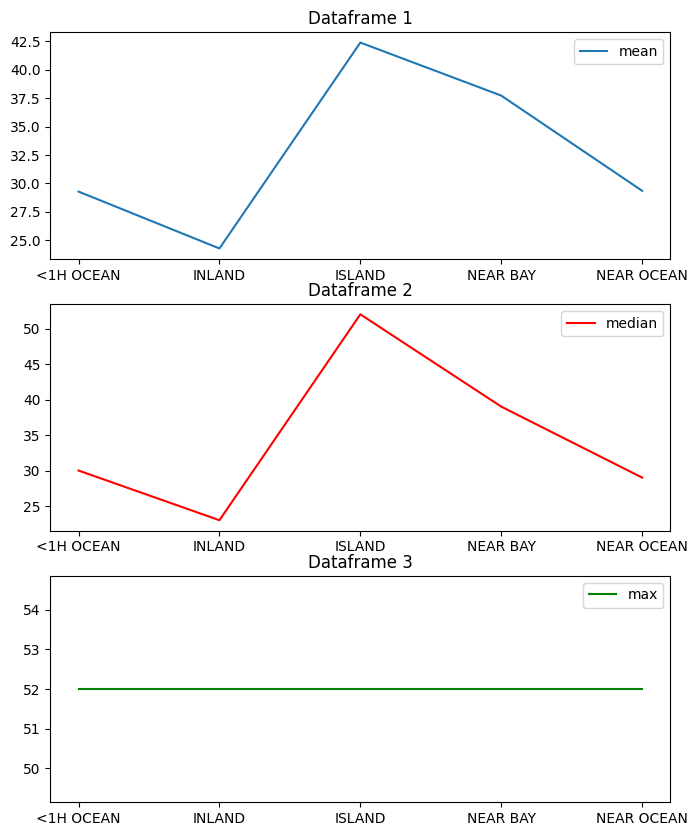

In [108]:
#median age v/s ocean proximity
a=df.groupby('ocean_proximity')['housing_median_age'].mean()
b=df.groupby('ocean_proximity')['housing_median_age'].median()
c=df.groupby('ocean_proximity')['housing_median_age'].max()

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].plot(a.index,a.values, label='mean')
axs[0].set_title('Dataframe 1')
axs[0].legend()

axs[1].plot(b.index, b.values, color='red', label='median')
axs[1].set_title('Dataframe 2')
axs[1].legend()

axs[2].plot(c.index, c.values, color='green', label='max')
axs[2].set_title('Dataframe 3')
axs[2].legend()

<BarContainer object of 5 artists>

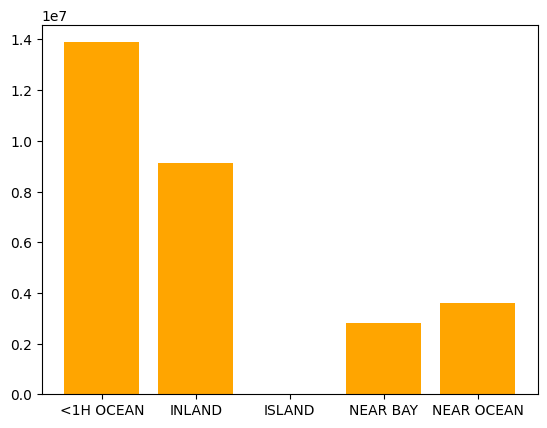

In [109]:
#population v/s ocean proximity
c=df.groupby('ocean_proximity')['population'].sum()
plt.bar(c.index,c.values,color='orange')

In [110]:
#showing island population
c

ocean_proximity
<1H OCEAN     13889374
INLAND         9112744
ISLAND            3340
NEAR BAY       2817427
NEAR OCEAN     3598955
Name: population, dtype: int64

Text(0.5, 1.0, 'Age v/s Price')

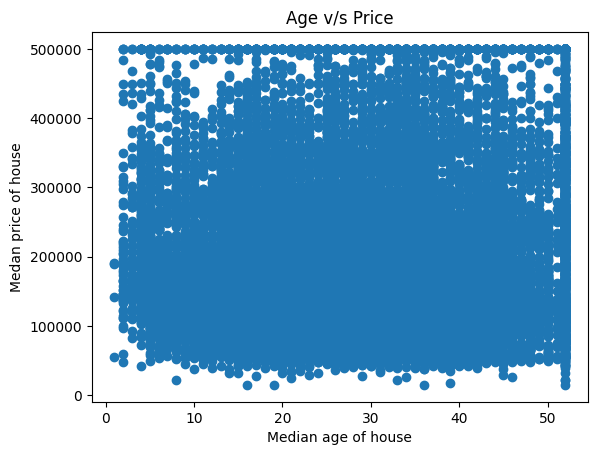

In [111]:
#housing_median_age v/s median_house_value
plt.scatter(df['housing_median_age'],df['median_house_value'])
plt.xlabel('Median age of house')
plt.ylabel('Medan price of house')
plt.title('Age v/s Price')

**Prediction**

As seen above there were 207 null values in the dataset so now what we are doing is to create a new dataframe with these 207 null values, and predict the values of these houses with help of ML models and based on the results obtained in the training

In [112]:
df_null = df[df['total_bedrooms'].isna()]
df_null.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400


In [113]:
df=df.dropna()
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data=df.drop(['total_bedrooms'],axis=1)
room=df['total_bedrooms']

data = pd.get_dummies(data)
x_train,x_val,y_train,y_val=train_test_split(data,room,test_size=0.2,random_state=42)

randomforest=RandomForestRegressor(random_state=42)
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")


Root Mean Squared Error (RMSE): 48.45


In [123]:
df_null= df_null.reindex(columns=x_train.columns, fill_value=0)
predicted_bedrooms = randomforest.predict(df_null)
df_null['predicted_total_bedrooms'] = predicted_bedrooms

In [124]:
df_null.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,predicted_total_bedrooms
290,-122.16,37.77,47,1256,570,218,4.3750,0,False,False,0,True,False,255.89
341,-122.17,37.75,38,992,732,259,1.6196,0,False,False,0,True,False,272.98
538,-122.28,37.78,29,5154,3741,1273,2.5762,0,False,False,0,True,False,1403.54
563,-122.24,37.75,45,891,384,146,4.9489,0,False,False,0,True,False,160.27
696,-122.10,37.69,41,746,387,161,3.9063,0,False,False,0,True,False,167.13


**Now we will check the random forest regressor to check the difference between mean square error in house prices**

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data=df.drop(['median_house_value'],axis=1)
price=df['median_house_value']

data = pd.get_dummies(data)
x_train,x_val,y_train,y_val=train_test_split(data,price,test_size=0.2,random_state=42)

randomforest=RandomForestRegressor(random_state=42)
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")


Root Mean Squared Error (RMSE): $48,744.81


In [116]:
differences = np.abs(y_val - y_pred)
flags = differences < 48000
true_percentage = np.mean(flags) * 100
print(f"Percentage of predictions within $48000 of actual value: {true_percentage:.2f}%")


Percentage of predictions within $48000 of actual value: 79.42%
